## Code optimisation


#### When not to optimise?
A famous quote: *"The first rule of code optimisation - don't do it!"*  

The point is, premature code optimisation is all too easy a trap to get sucked into. Hours can be spent and readability can be sacrificed for negligible gains.  

#### When to optimise?
Mature code optimisation, however, is an important skill. When writing data science algorithms, being *performant* is one of the major considerations. An operation which is repeated countless times can stand to gain hugely through even slight optimisation. Witness all the excitement when a new algorithm is proposed for matrix multiplication in $\mathcal{O} (\text{fractionally better than previous best})$. At a time when there is growing awareness of the carbon footprint of computation-heavy applications, optimisation is undeniably highly valuable.  

#### How to optimise?
There are two ways code can be optimised:  
- algorithmic improvements: by changing the algorithm we can often get at the same answer faster.
- optimal language choice: writing the code in a performant language.

For the modern python developer, it could be argued that the latter is of less importance. If all heavy lifting is done using libraries such as numpy, then those operations are outsourced to optimal code, and python being slower on the few remaining operations will cause negligible delay.  

#### How to learn to optimise?
Algorithmic improvements however are an art; an art best studied by practising. How can our code benefit from the hare's speed, without compromising on the turtle's reliability? [Project Euler](https://projecteuler.net/) is an incredible resource of problems which can be solved computationally; and the problems can almost always be done the slow and steady turtle way, or with a bit of thought can be done optimally.  

#### This notebook
This notebook aims to showcase this using a simple example taken from Project Euler.

### PROBLEM: Largest palindrome product

#### Project Euler version of the problem:  

The original version of this problem at [Project Euler](https://projecteuler.net/problem=4) states:

> A palindromic number reads the same both ways. The largest palindrome made from the product of two 2-digit numbers is $9009 = 91 \times 99$.
> 
> Find the largest palindrome made from the product of two 3-digit numbers.



#### HackerRank version of the problem:  

The [HackerRank version of the same problem](https://www.hackerrank.com/contests/projecteuler/challenges/euler004/problem) is a little more interesting:

> A palindromic number reads the same both ways. The smallest 6 digit palindrome made from the product of two 3-digit numbers is $101101 = 143 \times 707$.  
> 
> Find the largest palindrome, made from the product of two 3-digit numbers, which is less than $N$.

This generalises the problem to all $N$. The Project Euler version of the problem is this problem for $N=999 \times 999 +1 = 998,002$, whereas here we must answer for any $N$.

#### Our version of the problem:  

In this notebook I will consider the same problem, generalised still further. The previous versions specified that the palindrome must be *"the product of two 3-digit numbers"*, i.e. the product of $a$ and $b$ where each number is between 100 and 999; mathematically, $a, b \in [100,999]$.  

We will generalise this to look at when there is a specified maximum value, $k$, so that $a, b \leq k$. (This may seem trivial, but it removes some of the tricks which can  give a shortcut to solving this problem). 

So the problem can be stated as  

> A palindromic number reads the same both ways. The smallest 6 digit palindrome made from the product of two numbers, each limited to maximum $999$, is $101101 = 143 \times 707$.  
> 
> Find the largest palindrome $p$, which can be expressed as the product of two integers $a$ and $b$, each of which is $k$ or less, where the palindrome is less than $N$.  

In summary, find the greatest $p$ which fulfills:

- $p \in P \text{ where } P = \{\text{set of all numeric palindromes} \}$
- $p < N$
- $p = ab \text{ where } a, b \leq k \text{ and } a, b \in \mathbb{Z}^+$

### Approach A: Simple

The simple approach is to look at all $a, b$ which fulfill $a, b \leq k$, and check if $a \times b$ gives a palindrome.  

To do this, the first step is a function which detects whether something is a palindrome. This will be run repeatedly, so needs to be optimal - and doing this is a good way of dipping ones toe in the murky waters of algorithmic improvement:


In [1]:
import math

non_palindrome = 900109
palindrome = 9001009 

In [2]:
def is_palindrome_1(num):
    num_ = str(num)
    num_reversed = num_[::-1]
    is_it_palindrome = num_==num_reversed
    return is_it_palindrome 

print(is_palindrome_1(non_palindrome), is_palindrome_1(palindrome))

%timeit is_palindrome_1(non_palindrome)
%timeit is_palindrome_1(palindrome)

False True
322 ns ± 15 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
334 ns ± 18.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


The above is a simple approach: convert to a string, and test if the string equals the string reversed.  

But perhaps that is performing more comparisons than necessary? We only need to compare the first half to the second half reversed. The above version checks every digit twice; we can do better!  

In fact, when there is an odd number of digits, we don't need to check the middle digit, only the ones before the middle against the ones after the middle, reversed.

In [3]:
def is_palindrome_2(num):
    num_ = str(num)
    half_way = len(num_)//2
    first_half = num_[:half_way]
    second_half = num_[-half_way:]
    second_half_reversed = second_half[::-1]
    is_it_palindrome = first_half==second_half_reversed
    return is_it_palindrome

print(is_palindrome_2(non_palindrome), is_palindrome_2(palindrome))

%timeit is_palindrome_2(non_palindrome)
%timeit is_palindrome_2(palindrome)

False True
586 ns ± 79.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
801 ns ± 112 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


##### Units of time:  

| unit name | unit symbol | in seconds |
| :- | -: | -: |
|   Nanosecond	 |   ns	  | $10^{−9}$ s
|   Microsecond	 |   µs  | $10^{−6}$ s
|   Millisecond	 |   ms	 | $10^{−3}$ s


Hmmm. It turns out that the second function actually takes almost twice as long! Only when you get to reeeeally long palindromes (approaching a million characters) is the second function any faster.   

It seems that slicing the string twice, for the first and second half, is slow.  

Another thing you could try is comparing the halves one digit at a time. That would certainly speed things up when a non-palindrome gets caught early on, as a `False` can be returned immediately. But looping through all the digits makes things so much slower for actual palindromes, (or for when it is only discovered later in the process that it isn't a palindrome), that it just isn't worth it.  

So we'll stick with `is_palindrome_1`:


In [4]:
is_palindrome = is_palindrome_1

#### Finding the palindrome

Now we can write a function which finds the largest palindrome by multiplying all combinations of numbers which satisfy $a, b \leq k  \text{ and } a, b \in \mathbb{Z}^+$, and checking whether the product $p$ is a palindrome.  

This is a brute force method, but even within brute force we can optimise. For comparison purposes, let's start with a function which is painfully non-optimal:

In [51]:
# Approach A : Version 1

def largest_product_palindrome_N_A1(k=999, N=101110):
    palindromes=[]
    for a in range(1, k+1):
        for b in range(1, k+1):
            product_a_b = a*b
            if is_palindrome(product_a_b) and product_a_b<N:
                palindromes.append([a, b, product_a_b])
                # print(a, b, product_a_b)
    return sorted(palindromes, key=lambda x:x[-1], reverse=True)

print(largest_product_palindrome_N_A1(k=999, N=101101+1)[:5])
%timeit largest_product_palindrome_N_A1(k=999, N=101101+1)

[[143, 707, 101101], [707, 143, 101101], [123, 813, 99999], [271, 369, 99999], [369, 271, 99999]]
427 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The most obvious redundancy here can be seen from the first two results:   
`[143, 707, 101101], [707, 143, 101101]`    
signifying $a=143, b=707 \therefore p=ab=101101$ and $a=707, b=143 \therefore p=ab=101101$.  
That is the same result!  

We can eliminate this by (arbitrarily) deciding that $a$ will always be smaller or equal to $b$: $ a \leq b$, and then for $a$ we only need to go through the smaller values, and for $b$ we only go through the larger values. 

Apart from limiting our search in $b$, as $b \geq a$, we can also use this to limit our search in $a$.  

As the problem statement specifies a constraint $p=ab<N$, i.e. $p=ab \leq N-1$, and we are adding a new constraint $ a \leq b$, we can say that $a \leq \sqrt{N-1}$.  

So now we have:  
- $a, b \in \mathbb{Z}^+$
- $a, b \leq k $ 
- $b \geq a$  
- $a \leq \sqrt{N-1}$   
and we can use this to write a better function.

In [50]:
# Approach A : Version 2

def largest_product_palindrome_N_A2(k=999, N=101110):
    palindromes=[] 
    # for a in range(1, k+1):
    a_max = min(k, math.floor(math.sqrt(N-1)))
    for a in range(1, a_max + 1 ):
        # for b in range(1, k+1):
        b_min = a
        b_max = k
        for b in range(b_min, b_max+1):
            product_a_b = a*b
            if is_palindrome(product_a_b) and product_a_b<N:
                palindromes.append([a, b, product_a_b])
                # print(a, b, product_a_b)
    return sorted(palindromes, key=lambda x:x[-1], reverse=True)

print(largest_product_palindrome_N_A2(k=999, N=101101+1)[:5])
%timeit largest_product_palindrome_N_A2(k=999, N=101101+1)

[[143, 707, 101101], [123, 813, 99999], [271, 369, 99999], [283, 353, 99899], [269, 371, 99799]]
104 ms ± 5.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


So no repetition in the above results, and it can be seen that that gives a great time saving of around 75%.  

But there is another inefficiency here: We know that $p=ab<N$, and in the above code this is enforced using the `if` statement: `if ... product_a_b<N`. But we could eliminate that part of the `if` by, for every given $a$, only looping through values of $b$ which are guaranteed to satisfy $ab<N$. So we can add the further constraint  

- $ab \leq N-1 \ \ \ \therefore \ \ \  b \leq \frac{N-1}{a}$

In [52]:
# Approach A : Version 3

def largest_product_palindrome_N_A3(k=999, N=101110):
    palindromes=[] 
    a_max = min(k, math.floor(math.sqrt(N-1)))
    for a in range(1, a_max + 1 ):
        b_min = a
        # b_max = k
        b_max = min(k, (N-1)//a )                                       # <=== new constraint
        for b in range(b_min, b_max+1):
            product_a_b = a*b
            # if is_palindrome(product_a_b) and product_a_b<N:          # <=== second condition now redundant
            if is_palindrome(product_a_b):
                palindromes.append([a, b, product_a_b])
                # print(a, b, product_a_b)
    return sorted(palindromes, key=lambda x:x[-1], reverse=True)

print(largest_product_palindrome_N_A3(k=999, N=101101+1)[:5])
%timeit largest_product_palindrome_N_A3(k=999, N=101101+1)

[[143, 707, 101101], [123, 813, 99999], [271, 369, 99999], [283, 353, 99899], [269, 371, 99799]]
65 ms ± 2.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Another significant saving - we've chopped a third off the time taken.  



Another thing we can do is to reverse the direction of our search in $b$. For each value of $a$ there will likely be many palindromes, each for a different value of $b$. But we are looking for the palindrome with the highest value, which for each value of $a$ will be yielded by the highest of those value of $b$. So, we can look at values for $b$ from the highest to the lowest, not starting with the lowest and increasing. That way, as soon as we find a palindrome match, we can skip checking lower values of $b$: there certainly won't be any lower $b$ which will give a larger palindrome. So we can immediately jump to the next value of $a$.

In [53]:
# Approach A : Version 4

def largest_product_palindrome_N_A4(k=999, N=101110):
    palindromes=[] 
    a_max = min(k, math.floor(math.sqrt(N-1)))
    for a in range(1, a_max + 1 ):
        b_min = a
        b_max = min(k, (N-1)//a ) 
        # for b in range(b_min, b_max+1):
        for b in range(b_max, b_min-1, -1):                               # <=== reverse search order of b
            product_a_b = a*b
            if is_palindrome(product_a_b):
                palindromes.append([a, b, product_a_b])
                # print(a, b, product_a_b)
                break                                                     # <=== NEW - stop looking for b's
    return sorted(palindromes, key=lambda x:x[-1], reverse=True)
    # return sorted(palindromes, key=lambda x:x[-1], reverse=True)[0][2]

print(largest_product_palindrome_N_A4(k=999, N=101101+1)[:5])
%timeit largest_product_palindrome_N_A4(k=999, N=101101+1)

[[143, 707, 101101], [123, 813, 99999], [271, 369, 99999], [283, 353, 99899], [269, 371, 99799]]
21.7 ms ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


So once again, the time taken has been driven down to less than a third of what it was last time.



Now the next step is clever. So far we have said that $b$ is going to be the greater of the two numbers which multiply to make the palindrome. And therefore we said that $b \geq a$; the minimal value we search through is therefore `b_min = a`.  

However, imagine that we have already looped through many values of $a$, and have already found a very promising candidate palindrome $p_{\text{largest so far}}$. This value $p_{\text{largest so far}}$ is close to the maximum of $N-1$. For future values of $a$, is there any point looking at small values of $b$? The smaller values of $b$, even if they do lead to a palindrome, but that palindrome will be smaller than $p_{\text{largest so far}}$ which we have already found!  

Using this insight we can say that we will redefine the minimum value of $b$ so we only search values of $b$ which can potentially give us a palindrome which will have a greater value than the current best:  To guarantee that $a \times b > p_{\text{largest so far}}$, we must stipulate that $b > \frac{p_{\text{largest so far}}}{a}$.



In [54]:
# Approach A : Version 5a

def largest_product_palindrome_N_A5(k=999, N=101110):
    largest_palindrome_so_far = 0                                                       # <=== NEW
    palindromes=[] 
    a_max = min(k, math.floor(math.sqrt(N-1)))
    for a in range(1, a_max + 1 ):
        # b_min = a
        b_min = max(a, math.ceil(largest_palindrome_so_far/a))                          # <=== NEW
        b_max = min(k, (N-1)//a ) 
        for b in range(b_max, b_min-1, -1):
            product_a_b = a*b
            if is_palindrome(product_a_b):
                palindromes.append([a, b, product_a_b])
                largest_palindrome_so_far = max(product_a_b, largest_palindrome_so_far) # <=== NEW
                # print(a, b, product_a_b)
                break
    return sorted(palindromes, key=lambda x:x[-1], reverse=True)

print(largest_product_palindrome_N_A5(k=999, N=101101+1)[:5])
%timeit largest_product_palindrome_N_A5(k=999, N=101101+1)

[[143, 707, 101101], [123, 813, 99999], [109, 911, 99299], [99, 951, 94149], [97, 957, 92829]]
3.11 ms ± 180 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


So this has created another huge saving, of more than 75%!   

And we also notice that now the list of palindromes returned doesn't have more than one of each palindrome. Previous versions of the function printed two options which multiplied to the palindrome $99999$:  
`[[143, 707, 101101], [123, 813, 99999], [271, 369, 99999], [283, 353, 99899], [269, 371, 99799]]`  
Whereas this version only has one $99999$, because after the first was found we only look for greater palindromes:  
`[[143, 707, 101101], [123, 813, 99999], [109, 911, 99299], [99, 951, 94149], [97, 957, 92829]]`



The next step is really just a continuation of the previous step. Recall that a couple steps ago, we reversed the search in $b$, but the search in $a$ is still from lowest to highest. We reasoned that all values of $a$ need to be checked, so it makes no difference which way we search in $a$.  

Or does it?  

It is true that we will need to search all values of $a$. However, now that we have restricted the function to only find record-breaking palindromes, that restriction will have the most effect if high-valued palindromes are found early on, so that the rest of the process can benefit from a decreased search space.  

So we can argue that it is worthwhile to reverse the search order for $a$ as well. $b$ will always be limited at $k$, as $b \leq k$. So lower values of $a$ will result in palindromes that are limited $p = ab \leq ak$. It is possible that often $p \leq ak \ll N-1$, i.e. the palindromes found for low values of $a$ can be far lower than the limit of $N-1$.  

For example, if $k=999, N=101101+1$, then when say $a=25$, we cannot possibly get a palindrome greater than $25 \times 999 = 24,975 \ll N-1 = 101101$. In fact, we would get $p=24,942$, and in future we will only look for values which break that record, but as this record is quite low, it isn't a huge restriction.  

So if we reverse the search direction for $a$ also, we will likely maximise $p_{\text{largest so far}}$ early on. And maximising $p_{\text{largest so far}}$ early on means that for future loops of $a$, the search for $b$ will be much smaller:

In [55]:
# Approach A : Version 5b

def largest_product_palindrome_N_A5b(k=999, N=101110):
    largest_palindrome_so_far = 0 
    palindromes=[] 
    a_max = min(k, math.floor(math.sqrt(N-1)))
    # for a in range(1, a_max + 1 ):
    for a in range(a_max, 0, -1 ):                                      # <=== reverse search order of a also
        b_min = max(a, math.ceil(largest_palindrome_so_far/a)) 
        b_max = min(k, (N-1)//a ) 
        for b in range(b_max, b_min-1, -1):
            product_a_b = a*b
            if is_palindrome(product_a_b):
                palindromes.append([a, b, product_a_b])
                largest_palindrome_so_far = max(product_a_b, largest_palindrome_so_far)
                # print(a, b, product_a_b)
                break
    return sorted(palindromes, key=lambda x:x[-1], reverse=True)

print(largest_product_palindrome_N_A5b(k=999, N=101101+1)[:5])
%timeit largest_product_palindrome_N_A5b(k=999, N=101101+1)

[[143, 707, 101101], [271, 369, 99999], [283, 353, 99899], [289, 331, 95659], [307, 307, 94249]]
792 µs ± 35.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


So another 75% of the execution time has been shaved off.

### Approach B: Shift of perspective

In the various versions of approach A, we repeatedly optimised the same approach. We had a lot of success in driving execution times down to almost a thousandth of the original unoptimised time. As it stands, I don't think this approach can be much approved on.  

However *one of the most important optimisation techniques* is actually trying to *recast the problem* so that we can approach it completely differently. A new approach can often be far faster than the most optimised version of the simple approach. (In fact there are often problems which seem that they can't be solved at all - but a change of perspective on the problem changes that.) 

> A famous example of this recasting is the [Sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes), an ancient algorithm for finding all prime numbers up to any given limit. The "simple" approach is to go through all the numbers, and for each number search for any factors of the number; if no factors are found, then it is a prime. The Sieve of Eratosthenes turns the process on its head: it goes through all the numbers, and finds all *multiples* of that number. All those numbers are recorded as *not* being primes. Once you have gone through all the numbers until half the limit, any numbers not excluded are sure to be primes.  
> 
> So the simple approach involves looping through *candidate primes*, and then testing those candidates to see if they really are primes by looping through looking for factors. Instead, the Sieve of Eratosthenes loops through *factors*, it doesn't directly search or test for primes at all, but once the process concludes we have the list of primes just the same. And this is far more efficient, as far less looping is involved.  

In our case, we can **recast the problem as follows**: The simple way involved searching for $a, b$ by looping through all values they can take, and then testing to see if their product is a palindrome. Instead, we can search for palindrome values, by looping through all values starting from $N-1$ and descending, and testing to see if the value can be expressed as a product of two positive integers $a,b \leq k$.  



The first thing we need is a function which finds the greatest palindrome $q$ below a given number $M$. This palindrome is not necessarily a valid answer for the problem, as it might not be expressable as a product of two positive integers. However for this function all we need is that it return the greatest palindrome below the value of $M$.  

To do this, we could simply descend through all values below $M$, and check each one for whether it is a palindrome. But that could potentially loop through a lot of values until it finds a palindrome. So we need a better way of directly discovering the next smaller palindrome.


#### A palindrome as a dot product of two vectors

To achieve this, we note that any valid palindrome $p$ can be expressed as a dot product of two vectors, where each vector has certain constraints. 

For example, the palindrome $35453$:

$$35453 =  U V = 
\begin{bmatrix}
u_1 \\
u_2 \\
u_3
\end{bmatrix}    
\begin{bmatrix}
v_1 \\
v_2 \\
v_3
\end{bmatrix}
=  
\begin{bmatrix}
3 \\
5 \\
4
\end{bmatrix}

\begin{bmatrix}
10,001\\
1,010 \\
100
\end{bmatrix}


$$


Similarly, the palindrome $354453$:

$$354453 =  U V = 
\begin{bmatrix}
u_1 \\
u_2 \\
u_3
\end{bmatrix}    
\begin{bmatrix}
v_1 \\
v_2 \\
v_3
\end{bmatrix}
=  
\begin{bmatrix}
3 \\
5 \\
4
\end{bmatrix}

\begin{bmatrix}
100,001\\
10,010 \\
1,100
\end{bmatrix}


$$

First, we calculate the number of digits in the palindrome: $n=\text{ceil}(\log_{10}(p+1))$.  So $n=5$ and $n=6$ in the above two examples. The length of the $U,V$ vectors is then $\text{ceil}(\frac{n}{2})$, so $3$ in both of the examples.   

When $n$, the length of the palindrome, is **even**, the $v_i$ constituents of vector $V$ can be given as $v_i = 10^{n-i} + 10^{i-1}$, for $1 \leq i \leq \text{ceil}(\frac{n}{2})$.  
So in the second example ($354453$):
- $v_1 = 10^{6-1} + 10^{1-1} = 10^5 + 1 = 100,001$; 
- $v_2 = 10^{6-2} + 10^{2-1} = 10^4 + 10 = 10,010$; 
- $v_3 = 10^{6-3} + 10^{3-1} = 10^3 + 10^2 = 1,100$.  

Each value is a sum of two terms.  

However when $n$ is **odd**, then the final value of $V$ shouldn't be a sum of the two terms. Since $n-i=i-1$, so $10^{n-i} = 10^{i-1}$. So when $n-i=i-1$, then $v_i = 10^{n-i}$ alone.   
So in the first example ($35453$): 
- $v_1 = 10^{5-1} + 10^{1-1} = 10^4 + 1 = 10,001$;  
- $v_2 = 10^{5-2} + 10^{2-1} = 10^2 + 10 = 1,010$; 
- but for $v_3$ there is no second term, $v_3 = 10^{5-3} = 10^2 = 100$.  

So the $v_i$ constituents of vector $V$ can be given as $v_i = 10^{n-i} + 10^{i-1} \ \textbf{1}(n-i \neq i-1)$ (where $\textbf{1}$ signifies an indicator function which prevents the second term appearing when it shouldn't).  


The values of the vector $U$ are then calculated accordingly, with the constraints that $u_i \in [0,9] \text{ for } i > 1$, and $u_1 \in [1,9]$, i.e. $u_1 \neq 0$ (because leading zero's are dropped).

#### Finding the greatest palindrome below $M$

Now we have observed that palindromes can always be expressed like this, we can easily develop a method to find the greatest palindrome below $M$.   
We first calculate  $n=\text{ceil}(\log_{10}(M-1))$. So for example if $M=100$ or $M=101$, the greatest palindrome below $M$ will have 2 digits ($99$); but if $M=102$, the greatest palindrome below $M$ ($101$) will have 3 digits.  

Using this value of $n$, we can construct the vector $V$ as above.  

Then we can find the vector $U$ which satisfies the above constraints, by dividing the remainder of $M$ by each successive value in $V$.  



#### Example 
For example, for $M=368$, we see that $n=3$. So, $V=\begin{bmatrix}
101 \\
10 \\
\end{bmatrix}$.   
We then find $U$ as follows: $u_1 = M // v_1 = 368 // 101 = 3 \text{ remainder } 65$, where $//$ denotes integer division.   
$u_2 = \text{ remainder } // v_2 = 65 // 10 = 6 \text{ remainder } 5$.  
We discard the final remainder, and so we have $U=\begin{bmatrix}
3 \\
6 \\
\end{bmatrix}$.   
We then can say 

$$p =  U V = 
\begin{bmatrix}
u_1 \\
u_2 
\end{bmatrix}    
\begin{bmatrix}
v_1 \\
v_2 
\end{bmatrix}
=  
\begin{bmatrix}
3 \\
6
\end{bmatrix}

\begin{bmatrix}
101\\
10
\end{bmatrix}

= 363
$$

So the greatest palindrome below $368$ is $363$.

In [11]:
#in general, finding the length of a number (how many digits it has) is faster using math.log10 than using len(str())

N = int(str(101101 )*100)
N=35453
%timeit math.ceil(math.log10(N+1))
%timeit len(str(N))

265 ns ± 37.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
382 ns ± 46.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [56]:
def largest_palindrome_M(M=999999, verbose=False):
    '''returns the largest palindrome with value *LESS THAN* M.
    E.g. largest_palindrome_M(1001) => 999, *NOT* 1001.
    (returned values may or may not be a product of two integers).'''
    
    # num_digits = n = num_digits_in_largest_palindrome_below_M:
    num_digits = max(1, math.ceil(math.log10(M-1)))   # e.g. for (100, 1000] => 3
    if verbose: print(num_digits)
    V = [10**(num_digits-1-num_digits_) 
            + (10**num_digits_ if (num_digits-1-num_digits_ != num_digits_) else 0)
                    for num_digits_ in range(math.ceil(num_digits/2))]
    #when num_digits is odd, the last value of `V`` will be double what it should be
    # if num_digits%2==1: V[-1] //= 2
    if verbose: print(V)
    U = []
    for v_i in V:
        u_i = min(9, (M-1)//v_i) 
            #need min(9,) bc otherwise mult_by can be 10, 
            # which causes mistake in e.g. largest_palindrome_M(19090) => 19081 (wrong!)
            # with the min(9,) it now gives 18981 (correct!)
        U.append(u_i)
        # M = M%v_i
        M -= u_i*v_i                    # M is the remainder here
    if verbose: print(U)

    palindrome_parts = ([u_i*v_i for u_i, v_i in zip(U, V)])
    if verbose: print(palindrome_parts)
    palindrome = sum(palindrome_parts)
    if verbose: print(palindrome)
    return palindrome

print(largest_palindrome_M(90509, verbose=True))
print(largest_palindrome_M(1001, verbose=True))
print(largest_palindrome_M(1002, verbose=True))
print(largest_palindrome_M(3, verbose=True))
print(largest_palindrome_M(2, verbose=True))
# 

%timeit largest_palindrome_M(200560)

5
[10001, 1010, 100]
[9, 0, 4]
[90009, 0, 400]
90409
90409
3
[101, 10]
[9, 9]
[909, 90]
999
999
4
[1001, 110]
[1, 0]
[1001, 0]
1001
1001
1
[1]
[2]
[2]
2
2
1
[1]
[1]
[1]
1
1
4.23 µs ± 209 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Now that we have a way of finding the *greatest palindrome* below $M$, we can use this to make a function for finding the *greatest **product**-palindrome* below $N$. We simply loop through the palindromes from $N$, descending, and check for each whether it can be expressed as the product of two integers, where each integer $a,b \leq k$:  

In [57]:
# Approach B : Version 1

def largest_product_palindrome_N_B1(k=999, N=101110):
    candidate_palindrome = largest_palindrome_M(M=N)
    while candidate_palindrome > 1:
        #see if candidate_palindrome can be expressed as product of 2 integers.
        for a in range(1, k+1):
            if candidate_palindrome%a == 0:
                b = candidate_palindrome//a
                if b <= k:
                    return [[a, b, candidate_palindrome, ]]
            
        candidate_palindrome = largest_palindrome_M(M=candidate_palindrome)
        
        
print(largest_product_palindrome_N_B1(k=999, N=101111))
print(largest_product_palindrome_N_B1(k=999, N=101101))
print(largest_product_palindrome_N_B1(k=999, N=101102))

[[143, 707, 101101]]
[[123, 813, 99999]]
[[143, 707, 101101]]


In [58]:
%timeit largest_product_palindrome_N_B1(k=999, N=101100)

61 µs ± 4.37 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


So Approach B, even without any optimisation, is more than 10 times faster than the most optimised version of Approach A.  

This really shows the importance of thinking through different high-level approaches rather than focusing solely on low-level optimisations.  

##### Optimising Approach B

Approach B too can be optimised. In our check for whether the candidate palindrome is the product of two integers $a,b$, we can re-use some of the insight we developed in approach A about the constraints for $a,b$.  

In this new approach we won't be looping through all possible values of both integers, just of one of them, and the other will be inferred. We can choose to loop through $a$, the smaller of the two, as the range of possible values is smaller for $a$ than it is for $b$: We know that for a specific candidate palindrome $p_{\text{candidate}}$, if it can be expressed as a product of two integers, then the smaller of those two integers must be smaller or equal to the square root of the candidate palindrome, $a \leq \sqrt{p_{\text{candidate}}}$.  

Furthermore, we know that $b \leq k $. If a solution exists for $p_{\text{candidate}} = ab$, then $a=\frac{p_{\text{candidate}}}{b}$. So we can use $b \leq k $ and say $a \geq \frac{p_{\text{candidate}}}{k}$.

So our list of constraints for $a$ is:  

- $a \in \mathbb{Z}^+$
- $a \leq k $ 
- $a \leq \sqrt{p_{\text{candidate}}}$   
- $a \geq \frac{p_{\text{candidate}}}{k}$  

Within those constraints, there doesn't seem to be any advantage of looping through $a$ in descending order rather than in ascending order.  

Finally, it is possible that $N \gg k^2$. In that case, there is no point starting the search for a palindrome at $N$, because all the values in $(k^2, N]$ can't be expressed as $a \times b$ where $a,b \leq k$. In other words, the largest product-palindrome possible is limited not only by $N$ but also by $k^2$, as $ab \leq k^2$. So we will limit the search start to $\min (N-1, k^2)$.

In [59]:
# Approach B : Version 2

def largest_product_palindrome_N_B2(k=999, N=101110):
    # candidate_palindrome = largest_palindrome_M(M=N)
    candidate_palindrome = largest_palindrome_M(M=min(N, k**2 + 1))     # <===  NEW
    while candidate_palindrome > 1:
        # print(candidate_palindrome)
        # for a in range(1, k+1):
        a_min = math.ceil(candidate_palindrome/k)                       # <===  NEW
        a_max = min(k, math.floor(math.sqrt(candidate_palindrome)))     # <===  NEW
        for a in range(a_min, a_max+1):
        # for a in range(a_max, a_min-1, -1):
            if candidate_palindrome%a == 0:
                b = candidate_palindrome//a
                # if b <= k:                                            # <=== UNNECESSARY - guaranteed to be so
                return [[a, b, candidate_palindrome, ]]
            
        candidate_palindrome = largest_palindrome_M(M=candidate_palindrome)
        
        
print(largest_product_palindrome_N_B2(k=999, N=101111))
print(largest_product_palindrome_N_B2(k=999, N=101101))
print(largest_product_palindrome_N_B2(k=999, N=101102))

%timeit largest_product_palindrome_N_B2(k=999, N=101100)

[[143, 707, 101101]]
[[123, 813, 99999]]
[[143, 707, 101101]]
21.4 µs ± 1.88 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


So this new function took about a third of the time of the previous version. And when $N \gg k^2$, savings will be far greater.

### Comparing the different functions: Output

In [16]:
largest_product_palindrome_N_functions = [
    largest_product_palindrome_N_A1,
    largest_product_palindrome_N_A2,
    largest_product_palindrome_N_A3,
    largest_product_palindrome_N_A4,
    largest_product_palindrome_N_A5,
    largest_product_palindrome_N_A5b,

    largest_product_palindrome_N_B1,
    largest_product_palindrome_N_B2,
]

In [17]:
for largest_product_palindrome_N_function in largest_product_palindrome_N_functions:
    print(largest_product_palindrome_N_function.__name__, '\t', largest_product_palindrome_N_function(k=150,N=1000)[:3],)

largest_product_palindrome_N_A1 	 [[9, 111, 999], [27, 37, 999], [37, 27, 999]]
largest_product_palindrome_N_A2 	 [[9, 111, 999], [27, 37, 999], [23, 43, 989]]
largest_product_palindrome_N_A3 	 [[9, 111, 999], [27, 37, 999], [23, 43, 989]]
largest_product_palindrome_N_A4 	 [[9, 111, 999], [27, 37, 999], [23, 43, 989]]
largest_product_palindrome_N_A5 	 [[9, 111, 999], [27, 37, 999], [7, 137, 959]]
largest_product_palindrome_N_A5b 	 [[27, 37, 999], [9, 111, 999], [28, 31, 868]]
largest_product_palindrome_N_B1 	 [[9, 111, 999]]
largest_product_palindrome_N_B2 	 [[9, 111, 999]]


- The first version of approach A has duplicate results `[27, 37, 999], [37, 27, 999]`.
- In approach A, only the earlier versions return comprehensive lists of all palindromes. For example, the function `largest_product_palindrome_N_A5` doesn't find the palindrome $989$.
- Under approach A a list of palindromes is returned, whereas under approach B, only the largest palindrome is found.
- The different approaches used different values of $a,b$ to get the same result. E.g. `[9, 111, 999]` and `[27, 37, 999]`.
- All approaches correctly identified the greatest product-palindrome as $999$.



### Comparing the different functions: Speed

In [18]:
import pandas as pd
import IPython
import random

In [19]:

try:
    speeds_df = pd.read_csv('speeds.csv')
    print('data read from file:', len(speeds_df), 'records')
except FileNotFoundError:
    speeds_df = pd.DataFrame()
    print('no data read from file')
    
    
speeds = []

while len(speeds_df) + len(speeds) < 2500:
# for N in [100, 10000, 10000000]:
#     for k in range(50, 1001, 50):
    N = random.choice([100, 10000, 10000000])
    k = random.randint(10,1000)

    for largest_product_palindrome_N_function in largest_product_palindrome_N_functions:

        greatest_product_palindrome = largest_product_palindrome_N_function(k=k,N=N)[0][-1]

        times = %timeit -q -o -r3 largest_product_palindrome_N_function(k=k,N=N)
        
        speeds.extend([{
            'N'                             : N,
            'k'                             : k,
            'function_name'                 : largest_product_palindrome_N_function.__name__,
            'function_ref'                  : largest_product_palindrome_N_function.__name__.replace(
                                                                    'largest_product_palindrome_N_', ''),
            'greatest_product_palindrome'   : greatest_product_palindrome,
            # 'runtime_mean'                  : times.average, 
            # 'runtime_SD'                    : times.stdev, 
            'runtime_time'                  : time__, 
            'timeit_object'                 : times,

        } for time__ in times.timings])
        # print(largest_product_palindrome_N_function.__name__, '\t', largest_product_palindrome_N_function(k=150,N=1000)[:3],)
    
    results_same_Nk = speeds[-len(largest_product_palindrome_N_functions)*len(times.timings) : ]
    results_same_Nk_palindrome = [item['greatest_product_palindrome'] for item in results_same_Nk]
    if min(results_same_Nk_palindrome)!=max(results_same_Nk_palindrome):
        IPython.display.display(pd.DataFrame(results_same_Nk))
    
speeds_df = pd.concat([speeds_df, pd.DataFrame(speeds)])
print('number of records:', len(speeds_df))

speeds_df.to_csv('speeds.csv', index=False)
print('data saved to file')

speeds_df

data read from file: 2520 records
number of records: 2520
data saved to file


,N,k,function_name,function_ref,greatest_product_palindrome,runtime_time,timeit_object
0,10000,406,largest_product_palindrome_N_A1,A1,9999,0.057014,58.4 ms ± 965 µs per loop (mean ± std. dev. of...
1,10000,406,largest_product_palindrome_N_A1,A1,9999,0.058916,58.4 ms ± 965 µs per loop (mean ± std. dev. of...
2,10000,406,largest_product_palindrome_N_A1,A1,9999,0.059179,58.4 ms ± 965 µs per loop (mean ± std. dev. of...
3,10000,406,largest_product_palindrome_N_A2,A2,9999,0.012584,13.2 ms ± 580 µs per loop (mean ± std. dev. of...
4,10000,406,largest_product_palindrome_N_A2,A2,9999,0.013989,13.2 ms ± 580 µs per loop (mean ± std. dev. of...
...,...,...,...,...,...,...,...
2515,10000,113,largest_product_palindrome_N_B1,B1,9999,0.000015,14.2 µs ± 399 ns per loop (mean ± std. dev. of...
2516,10000,113,largest_product_palindrome_N_B1,B1,9999,0.000014,14.2 µs ± 399 ns per loop (mean ± std. dev. of...
2517,10000,113,largest_product_palindrome_N_B2,B2,9999,0.000010,9.55 µs ± 312 ns per loop (mean ± std. dev. of...
2518,10000,113,largest_product_palindrome_N_B2,B2,9999,0.000010,9.55 µs ± 312 ns per loop (mean ± std. dev. of...


#### Check function results

First, let's check for whether different results were given by the various functions for any of the values of $N,k$. If so that means we've made a mistake somewhere...  

In [20]:
speeds_df_agg = speeds_df[['N', 'k', 'greatest_product_palindrome']].groupby(['N', 'k']).aggregate(['min', 'max'])
speeds_df_agg['min=max'] = speeds_df_agg[('greatest_product_palindrome', 'min')] == speeds_df_agg[('greatest_product_palindrome', 'max')]
speeds_df_agg[~speeds_df_agg['min=max']]
# speeds_df_agg.sort_values(by='min=max')

Empty DataFrame
Columns: [(greatest_product_palindrome, min), (greatest_product_palindrome, max), (min=max, )]
Index: []

The above table is empty - good, that means all the functions gave the same answer.

#### Look at timings for Approach A

As there are several functions, we will first look at the various functions from the first approach, where we expect the last function (`A5b`) to be the fastest.  

Then we will consider the functions from the second approach, again expecting the last (`B2`) to be quickest.  

Finally, we will compare the two best functions from each of the approaches.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

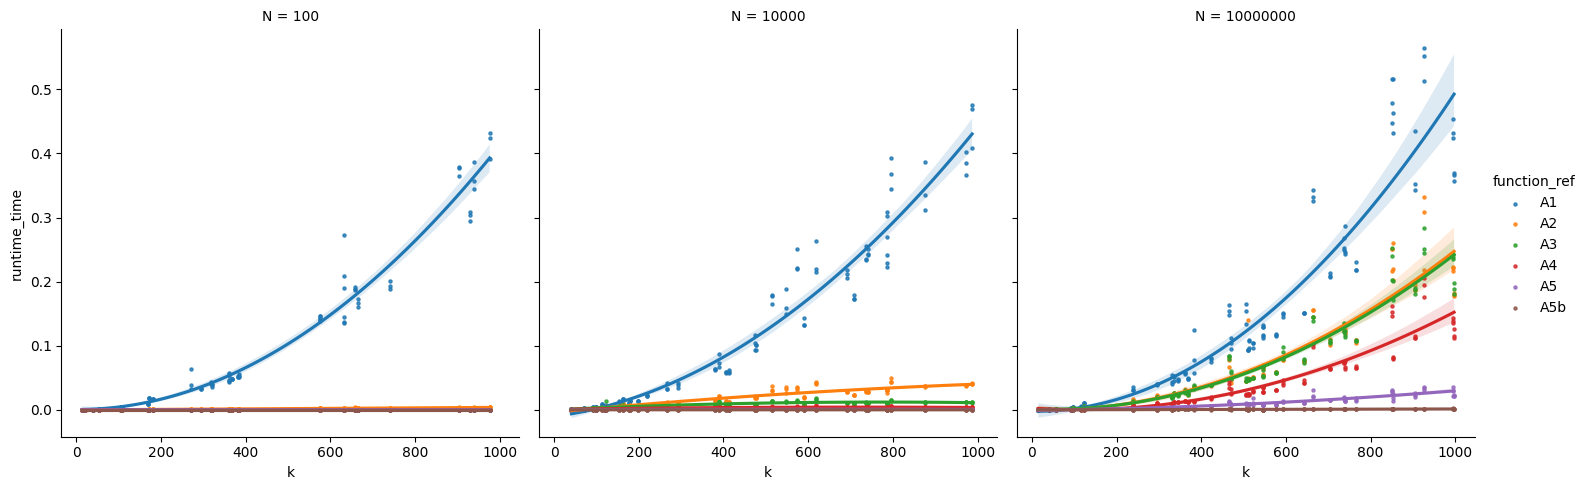

In [ ]:
speeds_df_A = speeds_df[speeds_df['function_ref'].str.startswith('A')]

sns.lmplot(speeds_df_A, x='k', y='runtime_time', hue='function_ref', col='N', order=2, scatter_kws=dict(alpha=.8, s=5), )
plt.show() 

It seems clear that:
- `A5b` is indeed the most efficient function.
- Most of the functions are slower for greater $N$
- Most of the functions are slower for greater $k$, and this relationship appears to be quadratic

To verify this we can zoom in on the lowest portion of the plot:

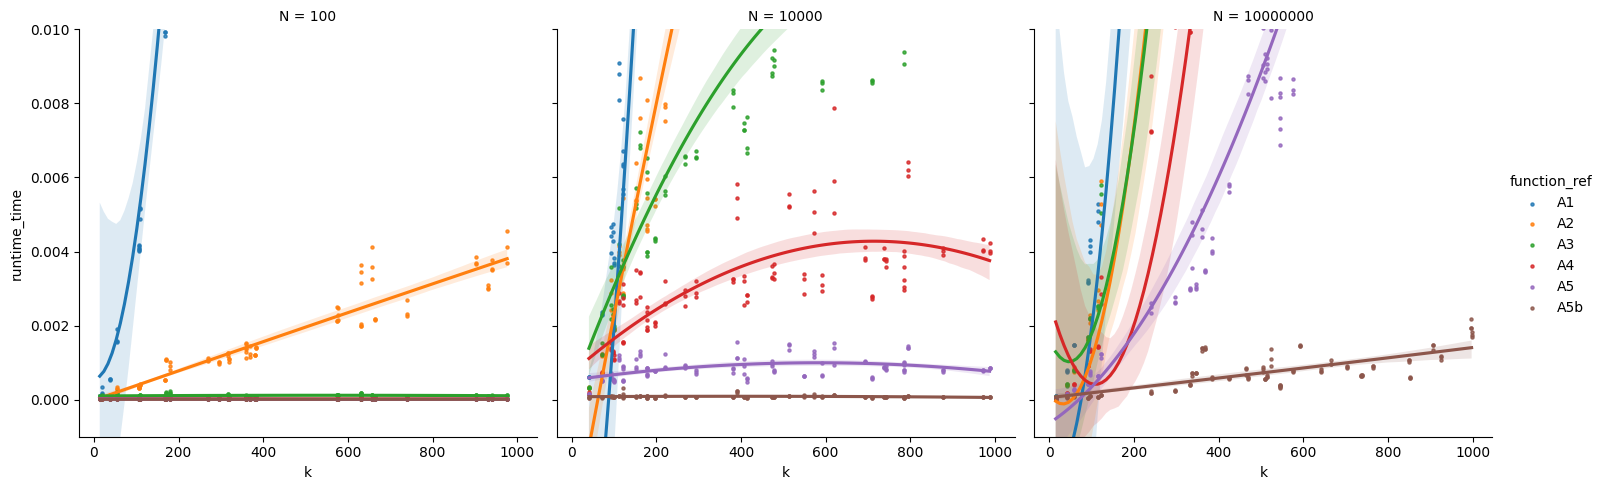

In [ ]:
sns.lmplot(speeds_df_A, x='k', y='runtime_time', hue='function_ref', col='N', order=2, scatter_kws=dict(alpha=.8, s=5), )
plt.ylim(top=0.01, bottom=-0.001)
plt.show() 

This zoomed in plot shows that `A5b` is also not indifferent to $k$, as can be seen for the highest value of $N$.  

#### Look at timings for Approach B

Now we consider the functions from **Approach B**:

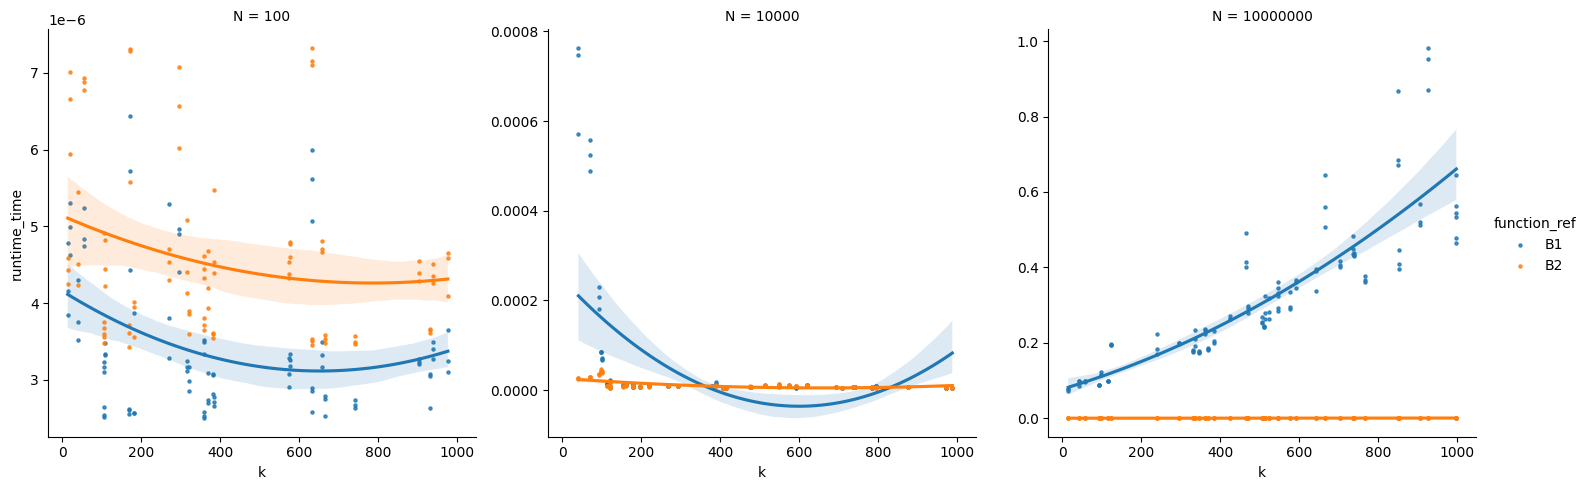

In [ ]:
speeds_df_B = speeds_df[speeds_df['function_ref'].str.startswith('B')]

sns.lmplot(speeds_df_B, x='k', y='runtime_time', hue='function_ref', col='N', order=2, 
            scatter_kws=dict(alpha=.8, s=5), facet_kws=dict(sharey=False))
# plt.ylim(-0.003, 0.1)
plt.show() 

These plots show that :
- For large $N$, `B2` is the most efficient of the Approach B functions, as expected.
- When $N$ is very small, `B1` is actually faster. Presumably the explanation is that all the extra calculations to restrict the search space aren't needed for such small $N$, so they slow things down without delivering any gain.  
- The middle plot above ($N=10,000$) is interesting as it shows that `B1` is actually slower for lower values of $k$, whereas for higher values of $k$ both functions are about equally fast. 

    This makes perfect sense. Recall that the final optimisation made to `B2` was to limit the palindrome search to $p \leq k^2$. `B1` doesn't do this, so for $N=10000$ it always starts searching at $10,000$. It does so even for low $k$, where the low value of $k$ means it is impossible to have a valid solution higher than $k^2$. So when $k < \sqrt{N}$, in this example $k < \sqrt{N} = 100$, there is some wasted searching, and the lower $k$ is, the more wasted time there is, so when $k \ll \sqrt{N}$ there is a lot of waste.  

    This totally explains the shape of the blue data in the middle plot. It can be divided into two sections: 
    1) $k<100$, where there are wasted tests. In this section, the time decreases as $k$ increases, as when $k$ approaches $100$ there is less wastage.
    2) $k \geq 100$, where there are no wasted tests for palindromes which couldn't possibly be expressed as $a \times b$ for $a,b \leq k$. In this section, the time taken is fairly constant and is comparable to the orange data.

    (So the line of best fit isn't helpful in this case.)



#### Finals: showdown between approach A and approach B

In the next graph, we look only at `A5b`, the best of the approach A functions, and `B2`, the best of the approach B functions.

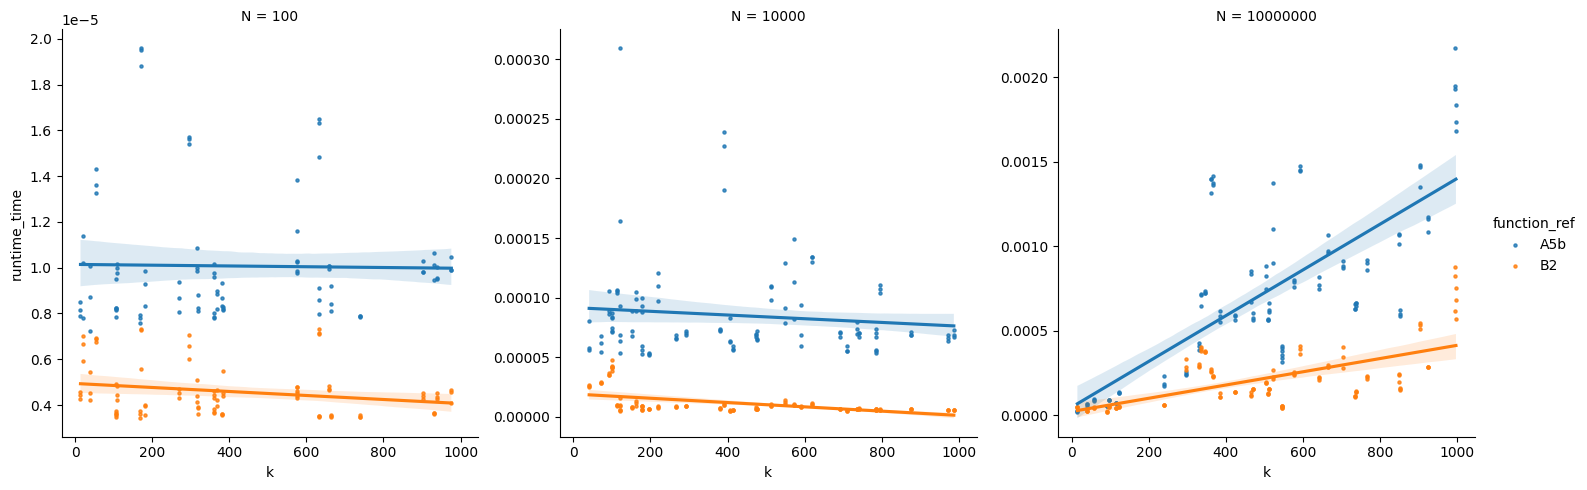

In [ ]:
speeds_df_A5b_B2 = speeds_df[(speeds_df['function_ref']=='A5b') | (speeds_df['function_ref']=='B2')]

sns.lmplot(speeds_df_A5b_B2, x='k', y='runtime_time', hue='function_ref', col='N', order=1, 
    scatter_kws=dict(alpha=.8, s=5), facet_kws=dict(sharey=False))
# plt.ylim(-0.00003, 0.001)
plt.show() 

This can also be visualised using split violin plots. These show  the distribution of times for each $N$ and for each bin/range of $k$'s, for each of the two functions. It is clear that the values are always higher for function `A5b`, as `B2` is the more efficient of the two.  

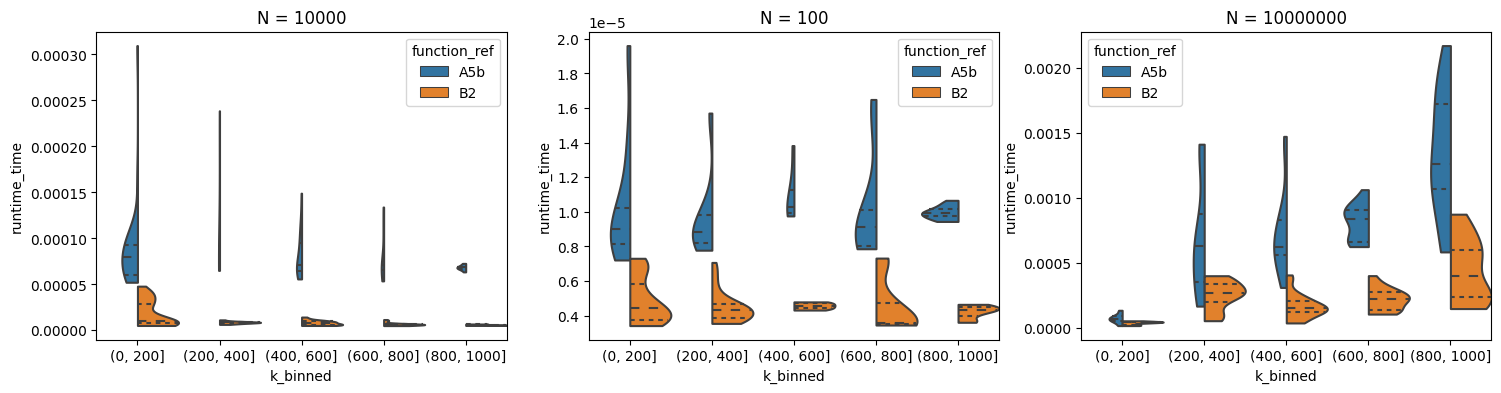

In [ ]:
speeds_df_A5b_B2 = speeds_df[(speeds_df['function_ref']=='A5b') | (speeds_df['function_ref']=='B2')]
speeds_df_A5b_B2.insert(2, 'k_binned',    pd.cut(speeds_df_A5b_B2['k'], bins=list(range(0, 1001, 200)))   )

fig, axs = plt.subplots(nrows=1, ncols=len(pd.unique(speeds_df_A5b_B2.N)), figsize=(18,4))
for i, N_ in enumerate(pd.unique(speeds_df_A5b_B2.N)):
    sns.violinplot(speeds_df_A5b_B2[speeds_df_A5b_B2.N==N_], x='k_binned', y='runtime_time', hue='function_ref', split=True, 
                    cut=0, inner='quartiles', width=1, ax=axs[i])
    axs[i].set_title('N = ' + str(N_))
plt.show()

#### Is that a fair comparison?  

Perhaps there is an unfair advantage enjoyed by `B2`: `A5b` creates a list of multiple palindromes, and then sorts it to return the greatest of them. `B2` however only returns the single greatest palindrome. Perhaps if `A5b` only bothered to remember the greatest palindrome, it would shave off a few more critical microseconds?  

My gut feeling is that it won't make much difference. Procedurally, `A5b` won't be much affected by that change. The only difference really would be that we wouldn't need to sort the list of candidate palindromes right at the end of the function. However eliminating that would be an example of optimisation which isn't really worth it. The list sort is only run once, as opposed to other parts of the function inside the loop which can be run thousands of times.  

However a discussion of optimisation wouldn't be complete without mentioning profiling, so let's look into this anyway. We can enlist `%prun` to give us some data on how many times each part of the function is run, and how long each part runs for. So let's run that on `A5b`:

In [ ]:
stats = %prun -r -l 0.01 largest_product_palindrome_N_A5b(k=10**7, N=10**15) 
stats_ = [ {'filename:lineno(function)':name, **details.__dict__} for name, details in stats.get_stats_profile().func_profiles.items()]
pd.DataFrame(stats_).sort_values(by='tottime', ascending=False) 

,filename:lineno(function),ncalls,tottime,percall_tottime,cumtime,percall_cumtime,file_name,line_number
0,largest_product_palindrome_N_A5b,1,8.231,8.231,14.748,14.748,3300917290.py,3
1,is_palindrome_1,4736618,2.143,0.000,2.143,0.000,2980069454.py,1
2,<built-in method builtins.max>,10000001,1.781,0.000,1.781,0.000,~,0
3,<built-in method builtins.min>,10000001,1.637,0.000,1.637,0.000,~,0
4,<built-in method math.ceil>,10000000,0.955,0.000,0.955,0.000,~,0
5,<built-in method builtins.exec>,1,0.000,0.000,14.748,14.748,~,0
6,<built-in method builtins.sorted>,1,0.000,0.000,0.000,0.000,~,0
7,<module>,1,0.000,0.000,14.748,14.748,<string>,1
8,<built-in method math.sqrt>,1,0.000,0.000,0.000,0.000,~,0
9,<method 'disable' of '_lsprof.Profiler' objects>,1,0.000,0.000,0.000,0.000,~,0


         34736629 function calls in 14.748 seconds

As expected, the length of time spent on sorting (index=6) is zero to three decimal points... We won't gain anything really by eliminating that.  

Where a lot of time **is** taken is in the `is_palindrome_1` function, which verifies whether a given number is a palindrome. It was run almost 5 million times, and in total took over 2 seconds, a good chunk of the 15 seconds taken in total. That would be a good candidate for optimisation - and indeed the first thing we did in this notebook was to optimise that. So that approach is confirmed correct.  


##### The `%lprun` line profiler 

Now `%prun` only times *function calls*. Lines which aren't calls to functions aren't timed. In our case, `%prun` is sufficient to see how much time is spend on sorting. However it is worth mentioning [Robert Kern](https://pypi.org/user/rkern/)'s [line profiler](https://github.com/pyutils/line_profiler), which gives information about every line, whether or not it is a function call.

It needs to be installed using `pip install line_profiler`, and then loaded using `%load_ext line_profiler` (next cell), after which usage info can be seen using `%lprun?`.

In [22]:
%load_ext line_profiler

When using `%lprun`, the name of every function of which you want the lines to be profiled needs to be specified using `-f`. Only after that do you call the function.  

Here, we will profile the `A5b` function, and also the `is_palindrome` function which it uses. Those are the two functions which we've written above and so those are the ones we are interested in. So we use `-f` to name those functions, and then call the `largest_product_palindrome_N` function.

In [ ]:
is_palindrome = is_palindrome_1 
#       profile lines in this function      & in this function   when running this
%lprun -f largest_product_palindrome_N_A5b -f is_palindrome      largest_product_palindrome_N_A5b(k=10**7,N=10**15) 

Timer unit: 1e-07 s

Total time: 46.255 s
File: C:\Users\gzkis\AppData\Local\Temp\ipykernel_24228\3300917290.py
Function: largest_product_palindrome_N_A5b at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def largest_product_palindrome_N_A5b(k=999, N=101110):
     4         1          5.0      5.0      0.0      largest_palindrome_so_far = 0 
     5         1          4.0      4.0      0.0      palindromes=[] 
     6         1        106.0    106.0      0.0      a_max = min(k, math.floor(math.sqrt(N-1)))
     7                                               # for a in range(1, a_max + 1 ):
     8  10000000   39990390.0      4.0      8.6      for a in range(a_max, 0, -1 ):                              # <=== reverse search order of a also
     9  10000000   76793931.0      7.7     16.6          b_min = max(a, math.ceil(largest_palindrome_so_far/a)) 
    10  10000000   68061753.0      6.8     14.7          b_max = min

So that confirms that the sorting is very quick - only a few microseconds, out of a total of 40s.

#### `is_palindrome` function

We can use this line profiler to get insight into why the other `is_palindrome` function we wrote, `is_palindrome_2`, is actually slower. We change the `is_palindrome` function. Then run the line profiler, specifying `-f is_palindrome` only. Then we change the `is_palindrome` function back to the faster one.

In [ ]:
is_palindrome = is_palindrome_2

%lprun -f is_palindrome largest_product_palindrome_N_A5b(k=10**7,N=10**15) 

is_palindrome = is_palindrome_1


Timer unit: 1e-07 s

Total time: 15.6672 s
File: C:\Users\gzkis\AppData\Local\Temp\ipykernel_24228\3626601853.py
Function: is_palindrome_2 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def is_palindrome_2(num):
     2   4736618   32118873.0      6.8     20.5      num_ = str(num)
     3   4736618   21543526.0      4.5     13.8      half_way = len(num_)//2
     4   4736618   22071617.0      4.7     14.1      first_half = num_[:half_way]
     5   4736618   23145996.0      4.9     14.8      second_half = num_[-half_way:]
     6   4736618   22979982.0      4.9     14.7      second_half_reversed = second_half[::-1]
     7   4736618   17898859.0      3.8     11.4      is_it_palindrome = first_half==second_half_reversed
     8   4736618   16913004.0      3.6     10.8      return is_it_palindrome

This reveals that every slicing operation is expensive.   

If we wanted to optimise this function, we could use this information to check if would be worth combining the 5th and 6th lines: Instead of   

`second_half = num_[-half_way:]`       
`second_half_reversed = second_half[::-1]`

We could write just  

`second_half_reversed = num_[:half_way:-1]`.

While that would save a little, it would still be less efficient than the `is_palindrome_1` function, so we will leave it.

#### Back to optimising by avoiding sorting

We can further confirm that sorting isn't a big deal by modifying `A5b` to not create a list, so no sorting is required, and see if timings are improved as a result:

In [23]:
# Approach A : Version 5b_nolist

def largest_product_palindrome_N_A5b_nolist(k=999, N=101110):
    largest_palindrome_so_far = 0 
    # palindromes=[]                                                            # <=== removed
    a_max = min(k, math.floor(math.sqrt(N-1)))
    # for a in range(1, a_max + 1 ):
    for a in range(a_max, 0, -1 ):
        b_min = max(a, math.ceil(largest_palindrome_so_far/a)) 
        b_max = min(k, (N-1)//a ) 
        for b in range(b_max, b_min-1, -1):
            product_a_b = a*b
            if is_palindrome(product_a_b):
                # palindromes.append([a, b, product_a_b])                       # <=== removed
                # largest_palindrome_so_far = max(product_a_b, largest_palindrome_so_far) # <=== removed
                if product_a_b > largest_palindrome_so_far:                     # <=== NEW
                    largest_palindrome_so_far = product_a_b                     # <=== NEW
                    largest_palindrome_so_far_info = [a, b, product_a_b]        # <=== NEW
                # print(a, b, product_a_b)
                break
    # return sorted(palindromes, key=lambda x:x[-1], reverse=True)
    return largest_palindrome_so_far_info

print(largest_product_palindrome_N_A5b_nolist(k=999, N=101101+1)[:5])

[143, 707, 101101]


In [ ]:

print(largest_product_palindrome_N_A5b_nolist(k=999, N=101101+1)[:5])

[143, 707, 101101]


In [ ]:
stats = %prun -r -l 0.01 largest_product_palindrome_N_A5b_nolist(k=10**7, N=10**15)  
stats_ = [ {'filename:lineno(function)':name, **details.__dict__} for name, details in stats.get_stats_profile().func_profiles.items()]
pd.DataFrame(stats_).sort_values(by='tottime', ascending=False) 

,filename:lineno(function),ncalls,tottime,percall_tottime,cumtime,percall_cumtime,file_name,line_number
0,largest_product_palindrome_N_A5b_nolist,1,8.669,8.669,14.749,14.749,15001138.py,3
1,is_palindrome_1,4736618,1.810,0.000,1.810,0.000,2980069454.py,1
2,<built-in method builtins.max>,10000000,1.702,0.000,1.702,0.000,~,0
3,<built-in method builtins.min>,10000001,1.627,0.000,1.627,0.000,~,0
4,<built-in method math.ceil>,10000000,0.941,0.000,0.941,0.000,~,0
5,<built-in method builtins.exec>,1,0.000,0.000,14.749,14.749,~,0
6,<module>,1,0.000,0.000,14.749,14.749,<string>,1
7,<built-in method math.sqrt>,1,0.000,0.000,0.000,0.000,~,0
8,<built-in method math.floor>,1,0.000,0.000,0.000,0.000,~,0
9,<method 'disable' of '_lsprof.Profiler' objects>,1,0.000,0.000,0.000,0.000,~,0


         34736625 function calls in 14.749 seconds

The above profile has no entry for sort. But the entire time taken was almost identical to the profiler of the function which does have a sort. Let's use the proper `%timeit` to verify that:

In [ ]:
print(largest_product_palindrome_N_A5b(k=999, N=101101+1)[:5])
%timeit largest_product_palindrome_N_A5b(k=999, N=101101+1)

[[143, 707, 101101], [271, 369, 99999], [283, 353, 99899], [289, 331, 95659], [307, 307, 94249]]
776 µs ± 36.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
print(largest_product_palindrome_N_A5b_nolist(k=999, N=101101+1)[:5])
%timeit largest_product_palindrome_N_A5b_nolist(k=999, N=101101+1) 

[143, 707, 101101]
775 µs ± 9.48 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


So indeed, `A5b` and `A5b_no_list` are pretty much identical in terms of timings.  


### Memory usage 

What we can think about is how their memory usage will compare. In this particular situation it isn't major either way, but this is an important part of optimisation, so let's have a look.  

We can use the [memory_profiler](https://github.com/pythonprofilers/memory_profiler), written by Fabian Pedregosa and Philippe Gervais. First it must be installed, using `pip install memory_profiler`, then loaded:


In [24]:
%load_ext memory_profiler

Just as timing functions can be done for the whole function using `%timeit` and line-by-line using `%lprun`, similarly memory profiling can be done for the function as a whole using `%memit`, or line-by-line using `%mprun`. Help for both of these can be accessed using `%memit?` and `%mprun?` respectively.  

`%memit -c` means that children are included in the results. 

Observing the memory usage both with a list and without a list shows that there is little difference:

In [47]:
%memit -c a = largest_product_palindrome_N_A5b(k=10**3, N=10**6)
%memit -c a = largest_product_palindrome_N_A5b_nolist(k=10**3, N=10**6)
%memit -c a = largest_product_palindrome_N_B2(k=10**3, N=10**6)

peak memory: 148.14 MiB, increment: 42.00 MiB
peak memory: 147.90 MiB, increment: 41.76 MiB
peak memory: 148.04 MiB, increment: 41.90 MiB


So there isn't much difference in terms of memory usage between the different functions.

#### `%mprun`

To complete the discussion of memory profiling, we illustrate use of `%mprun` on the last function `B2`.  

To use `%mprun`, functions being profiled must be imported from an external file. They can't simply be used from within this notebook. This is an unfortunate limitation of the memory profiler which is mentioned in the [documentation](https://github.com/pythonprofilers/memory_profiler): "Note however that function my_func must be defined in a file (cannot have been defined interactively in the Python interpreter)".

To get around this, we can access the source code of all the functions in this notebook using `inspect.getsource`, save it to a file, and then import the functions for profiling.

In [37]:
import inspect
all_funcs = largest_product_palindrome_N_functions + [
    largest_product_palindrome_N_A5b_nolist, is_palindrome, largest_palindrome_M]
all_funcs = sorted(all_funcs,   key=lambda func:func.__name__)
print(*all_funcs, sep='\n')
all_funcs_source = [inspect.getsource(func) for func in all_funcs]
all_funcs_source = ['import math'] + all_funcs_source +  ['is_palindrome = is_palindrome_1']
all_funcs_source = ('\n'*3).join(all_funcs_source)

with open('all_palindrome_functions.py', mode='w') as file:
    print(all_funcs_source, file=file)      # save to file

<function is_palindrome_1 at 0x000001E00FAF8310>
<function largest_palindrome_M at 0x000001E00FAF8820>
<function largest_product_palindrome_N_A1 at 0x000001E00FAF8280>
<function largest_product_palindrome_N_A2 at 0x000001E00FAC2A60>
<function largest_product_palindrome_N_A3 at 0x000001E00FAC2E50>
<function largest_product_palindrome_N_A4 at 0x000001E00FAF8790>
<function largest_product_palindrome_N_A5 at 0x000001E00FAF81F0>
<function largest_product_palindrome_N_A5b at 0x000001E00FAF8160>
<function largest_product_palindrome_N_A5b_nolist at 0x000001E02197FB80>
<function largest_product_palindrome_N_B1 at 0x000001E00FAF8430>
<function largest_product_palindrome_N_B2 at 0x000001E00FB318B0>


In [44]:
import all_palindrome_functions as _

In [39]:
#          profile lines in this function       & in this function   when running this
%mprun -r -f _.largest_product_palindrome_N_B2  -f _.is_palindrome   _.largest_product_palindrome_N_B2(k=10**3,N=10**6) 

Filename: c:\Documents - G\Projects\hackerRank\Project Euler\Largest palindrome product smaller than N\all_palindrome_functions.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   190     58.5 MiB     58.5 MiB           1   def largest_product_palindrome_N_B2(k=999, N=101110):
   191                                             # candidate_palindrome = largest_palindrome_M(M=N)
   192     58.5 MiB      0.0 MiB           1       candidate_palindrome = largest_palindrome_M(M=min(N, k**2 + 1))     # <===  NEW
   193     58.5 MiB      0.0 MiB          94       while candidate_palindrome > 1:
   194                                                 # print(candidate_palindrome)
   195                                                 # for a in range(1, k+1):
   196     58.5 MiB      0.0 MiB          94           a_min = math.ceil(candidate_palindrome/k)                       # <===  NEW
   197     58.5 MiB      0.0 MiB          94           a_max = min(k, math.floor(math.sqrt(c

### HackerRank version

Just to finish off - to use the above function `B2` on HackerRank, we need to specify a lower bound for $a,b$ which by default will be $100$. This is because HackerRank specifies that $a, b$ are three-digit numbers, i.e. $100 \leq a, b \leq 999$. In the following code, `j` signifies the lower bound.

In [60]:
def largest_product_palindrome_N_B2(j=100, k=999, N=101110):
    candidate_palindrome = largest_palindrome_M(M=min(N, k**2 + 1))
    while candidate_palindrome > 1:
        a_min = max(j, math.ceil(candidate_palindrome/k))               # <===  NEW - a can't be smaller than j
        a_max = min(k, math.floor(math.sqrt(candidate_palindrome)))
        for a in range(a_min, a_max+1):
            if candidate_palindrome%a == 0:
                b = candidate_palindrome//a
                return [[a, b, candidate_palindrome, ]]
            
        candidate_palindrome = largest_palindrome_M(M=candidate_palindrome)

    return [[None]]                 # if no palindrome found which satisfies requirements

largest_product_palindrome_N_B2(j=100, k=999, N=103111)        

[[163, 627, 102201]]